<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/14_Deep_Computer_Vision_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>Convolutional Layers</h3></b></font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

\begin{equation*}
z_{i,j,k} = b_k + \sum_{u=0}^{f_h-1} \sum_{v=0}^{f_w-1} \sum_{k'=0}^{f_{n'}-1} x_{i',j',k'} \times w_{u,v,k',k} \space \space \mbox{with }\space \space \begin{cases} i' = i \times s_h + u \\ j' = j \times s_w + v \end{cases}
\end{equation*}

$z_{i,j,k}$  is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer (layer $l$).

$s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n′}$ is the number of feature maps in the previous layer (layer $l$ – 1).

$x_{i′, j′, k′}$ is the output of the neuron located in layer $l$ – 1, row $i′$, column $j′$, feature map $k′$ (or channel $k′$ if the previous layer is the input layer).

$b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness of the feature map $k$.

$w_{u, v, k′ ,k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron’s receptive field), and feature map $k′$.

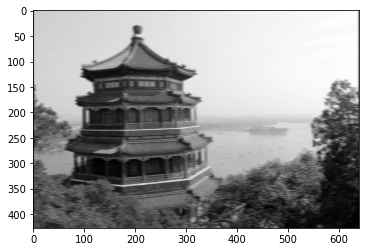

In [4]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255.0
flower = load_sample_image("flower.jpg") / 255.0
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

In [5]:
def crop(images):
    return images[150:220, 130:250]

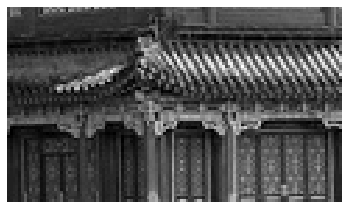

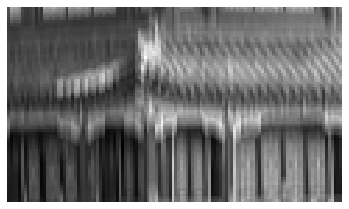

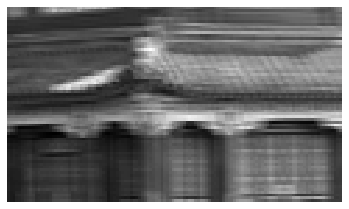

In [6]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

In [7]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding='SAME', activation='relu')

<font color='red'><b><h3>Pooling Layers</h3></b></font>

In [8]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
# similar for AvgPool2D

In [9]:
# depthwise max pooling
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3), padding='VALID')

UnimplementedError: ignored

In [10]:
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3), padding='VALID')
)

In [11]:
global_avg_pool = keras.layers.GlobalAvgPool2D()
# Output will be a single number per feature map and per instance
# Equivalent to
# global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

<font color='red'><b><h3>CNN Architectures</h3></b></font>

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.7044 - accuracy: 0.7534 - val_loss: 0.3791 - val_accuracy: 0.8670
Epoch 2/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4176 - accuracy: 0.8591 - val_loss: 0.3153 - val_accuracy: 0.8878
Epoch 3/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3596 - accuracy: 0.8801 - val_loss: 0.3134 - val_accuracy: 0.8814
Epoch 4/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3292 - accuracy: 0.8912 - val_loss: 0.2844 - val_accuracy: 0.8938
Epoch 5/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.3017 - accuracy: 0.8989 - val_loss: 0.2970 - val_accuracy: 0.8980
Epoch 6/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2849 - accuracy: 0.9026 - val_loss: 0.2822 - val_accuracy: 0.8928
Epoch 7/10
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2758 - accuracy: 0.9076 - val_loss: 0.2866 -

<font color='red'><b><h3>Implementing a ResNet-34 CNN Using Keras</h3></b></font>

In [15]:
class ResidualUnit(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
        keras.layers.Conv2D(filters, 3, strides=strides,
                            padding='same', use_bias=False),
        keras.layers.BatchNormalization(),
        self.activation,
        keras.layers.Conv2D(filters, 3, strides=1,
                            padding='same', use_bias=False),
        keras.layers.BatchNormalization(),
    ]

    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
          keras.layers.Conv2D(filters, 1, strides=strides,
                              padding='same', use_bias=False),
          keras.layers.BatchNormalization(),
      ]


  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)

    return self.activation(Z + skip_Z)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],
                              padding='same', use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same'))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

<font color='red'><b><h3>Using Pretrained Models from Keras</h3></b></font>

In [18]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


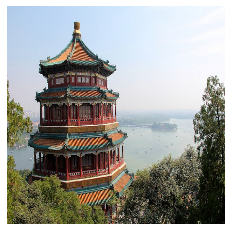

In [19]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])

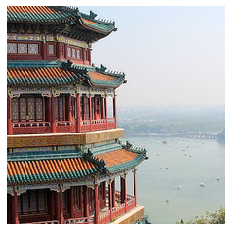

In [20]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])

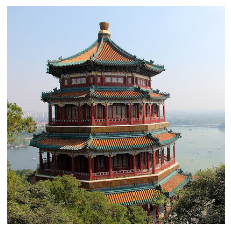

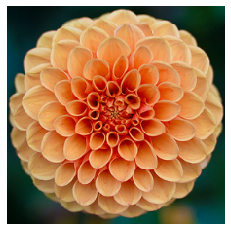

In [21]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [22]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [23]:
Y_proba = model.predict(inputs)

In [24]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
  print('Image #{}'.format(image_index))
  for class_id, name, y_proba in top_K[image_index]:
    print('   {} = {:12s} {:.2f}%'.format(class_id, name, y_proba * 100))
  print()

40960/35363 [==================================] - 0s 0us/step
Image #0
   n03877845 = palace       43.39%
   n02825657 = bell_cote    43.07%
   n03781244 = monastery    11.70%

Image #1
   n04522168 = vase         53.96%
   n07930864 = cup          9.52%
   n11939491 = daisy        4.97%



<font color='red'><b><h3>Pretrained Models for Transfer Learning</h3></b></font>

In [25]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('tf_flowers', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
dataset_size

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.0. Subsequent calls will reuse this data.


3670

In [26]:
class_names = info.features['label'].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [27]:
n_classes = info.features['label'].num_classes

In [28]:
test_set, valid_set, train_set = tfds.load(
    'tf_flowers',
    split=['train[:10%]', 'train[10%:25%]', 'train[25%:]'],
    as_supervised=True
)

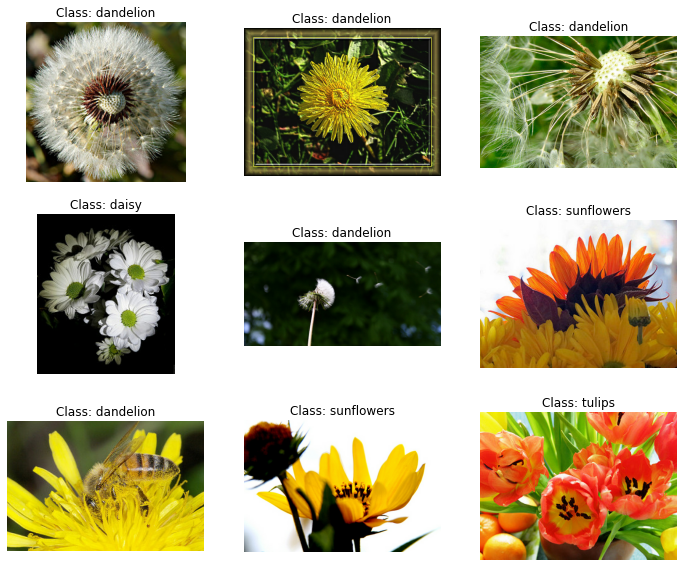

In [29]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [30]:
def preprocess(image, label):
  resized_image = tf.image.resize(image, [224, 224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image, label

In [31]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [32]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)

83689472/83683744 [==============================] - 1s 0us/step


In [33]:
# Add layers
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(avg)

# Create a model
model = keras.Model(inputs=base_model.input, outputs=output)

In [34]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_42
13 block2_pool
14 batch_normalization_36
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_43
23 block3_pool
24 batch_normalization_37
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_44
33 block4_pool
34 batch_normalization_38
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

In [35]:
# Freeze the weights of the pretrained layers
for layer in base_model.layers:
  layer.trainable = False

In [36]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

In [37]:
history = model.fit(train_set, 
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 34s 390ms/step - loss: 1.6303 - accuracy: 0.7802 - val_loss: 1.2904 - val_accuracy: 0.8235
Epoch 2/5
86/86 [==============================] - 32s 376ms/step - loss: 0.5412 - accuracy: 0.9095 - val_loss: 1.1062 - val_accuracy: 0.8529
Epoch 3/5
86/86 [==============================] - 32s 377ms/step - loss: 0.2645 - accuracy: 0.9408 - val_loss: 0.7818 - val_accuracy: 0.8658
Epoch 4/5
86/86 [==============================] - 32s 375ms/step - loss: 0.1269 - accuracy: 0.9629 - val_loss: 0.7745 - val_accuracy: 0.8621
Epoch 5/5
86/86 [==============================] - 32s 376ms/step - loss: 0.0821 - accuracy: 0.9757 - val_loss: 0.7586 - val_accuracy: 0.8695


In [38]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 110s 1s/step - loss: 0.3465 - accuracy: 0.8914 - val_loss: 0.4047 - val_accuracy: 0.8971
Epoch 2/40
86/86 [==============================] - 109s 1s/step - loss: 0.0739 - accuracy: 0.9793 - val_loss: 0.3409 - val_accuracy: 0.9118
Epoch 3/40
86/86 [==============================] - 109s 1s/step - loss: 0.0316 - accuracy: 0.9920 - val_loss: 0.3473 - val_accuracy: 0.8915
Epoch 4/40
86/86 [==============================] - 109s 1s/step - loss: 0.0240 - accuracy: 0.9935 - val_loss: 0.3302 - val_accuracy: 0.9007
Epoch 5/40
86/86 [==============================] - 109s 1s/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.3158 - val_accuracy: 0.9081
Epoch 6/40
86/86 [==============================] - 109s 1s/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.3173 - val_accuracy: 0.9173
Epoch 7/40
86/86 [==============================] - 109s 1s/step - loss: 0.0135 - accuracy: 0.9971 - val_loss: 0.3283 - val_accuracy: 0.9099
Epoch 8/40
86

<font color='red'><b><h3>Classification and Localization</h3></b></font>

In [39]:
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)

In [40]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation='softmax')(avg)
loc_output = keras.layers.Dense(4)(avg)

In [41]:
model = keras.Model(inputs=base_model.input,
                    outputs=[class_output, loc_output])
model.compile(loss=['sparse_categorical_crossentropy', 'mse'],
              loss_weights=[0.8, 0.2], # depends on what is more important
              optimizer=optimizer, metrics=['accuracy'])

In [42]:
def add_random_bounding_boxes(images, labels):
    fake_bboxes = tf.random.uniform([tf.shape(images)[0], 4])
    return images, (labels, fake_bboxes)

In [43]:
fake_train_set = train_set.take(5).repeat(2).map(add_random_bounding_boxes)

In [44]:
model.fit(fake_train_set, steps_per_epoch=5, epochs=2)

Epoch 1/2
5/5 [==============================] - 5s 985ms/step - loss: 1.4527 - dense_5_loss: 1.7086 - dense_6_loss: 0.4287 - dense_5_accuracy: 0.1875 - dense_6_accuracy: 0.2375
Epoch 2/2
5/5 [==============================] - 5s 978ms/step - loss: 1.3706 - dense_5_loss: 1.6262 - dense_6_loss: 0.3479 - dense_5_accuracy: 0.2125 - dense_6_accuracy: 0.2375


<font color='red'><b><h3>Exercises</h3></b></font>

In [45]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


In [46]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [49]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

In [50]:
history =model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.1429 - accuracy: 0.9548 - val_loss: 0.0486 - val_accuracy: 0.9864
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0402 - val_accuracy: 0.9872
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0392 - accuracy: 0.9872 - val_loss: 0.0354 - val_accuracy: 0.9906
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0379 - val_accuracy: 0.9914
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0328 - val_accuracy: 0.9916
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0391 - val_accuracy: 0.9910
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.0360 -

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0307 - accuracy: 0.9933


[0.03074982389807701, 0.9933000206947327]

In [52]:
# Question 11: Style Transfer
import PIL.Image
def tensor_to_image(tensor):
  tensor = tensor * 255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor) > 3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [53]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

# https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

196608/195196 [==============================] - 0s 0us/step


In [55]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [56]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

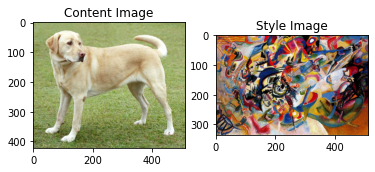

In [57]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [59]:
processed_image = keras.applications.vgg19.preprocess_input(content_image *255)
processed_image = tf.image.resize(processed_image, (224, 224))

In [60]:
base_model = keras.applications.VGG19(include_top=True, weights='imagenet')

574717952/574710816 [==============================] - 6s 0us/step


In [61]:
prediction_probabilities = base_model(processed_image)
prediction_probabilities.shape

TensorShape([1, 1000])

In [63]:
top_5 = keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]

In [65]:
for class_id, name, proba in top_5:
  print("{} - {:12s} {:.2f}%".format(class_id, name, proba * 100))

n02099712 - Labrador_retriever 49.32%
n02099601 - golden_retriever 23.67%
n02104029 - kuvasz       3.64%
n02099849 - Chesapeake_Bay_retriever 2.42%
n02107574 - Greater_Swiss_Mountain_dog 1.86%


In [66]:
# Load VGG19 without the classification head
base_model = keras.applications.VGG19(include_top=False, weights='imagenet')

80142336/80134624 [==============================] - 1s 0us/step


In [67]:
for layer in base_model.layers:
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [68]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [69]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  base_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  base_model.trainable = False
  
  outputs = [base_model.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([base_model.input], outputs)
  return model

In [70]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 336, 512, 64)
  min:  0.0
  max:  835.5256
  mean:  33.97525

block2_conv1
  shape:  (1, 168, 256, 128)
  min:  0.0
  max:  4625.8857
  mean:  199.82687

block3_conv1
  shape:  (1, 84, 128, 256)
  min:  0.0
  max:  8789.239
  mean:  230.78099

block4_conv1
  shape:  (1, 42, 64, 512)
  min:  0.0
  max:  21566.135
  mean:  791.24005

block5_conv1
  shape:  (1, 21, 32, 512)
  min:  0.0
  max:  3189.2542
  mean:  59.179478



In [71]:
# Calculate style
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [72]:
# Extract style and content
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

In [73]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0055228444
    max:  28014.557
    mean:  263.79025

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.473
    mean:  9100.949

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.3
    mean:  7660.9766

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320504.0
    mean:  134288.84

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.38
    mean:  1487.0378

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8796
    mean:  13.764149


In [74]:
# Run gradient descent
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [75]:
image = tf.Variable(content_image)

In [76]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [77]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [78]:
style_weight = 1e-2
content_weight = 1e4

In [79]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [80]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

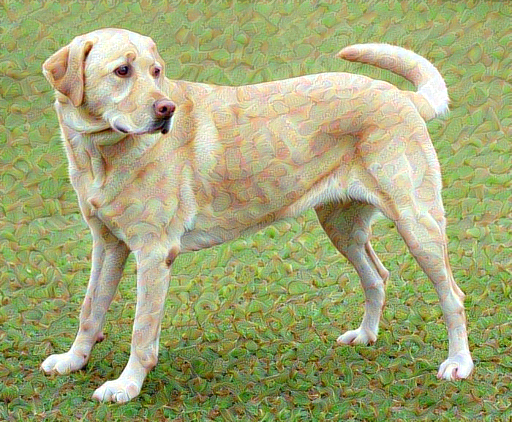

In [81]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

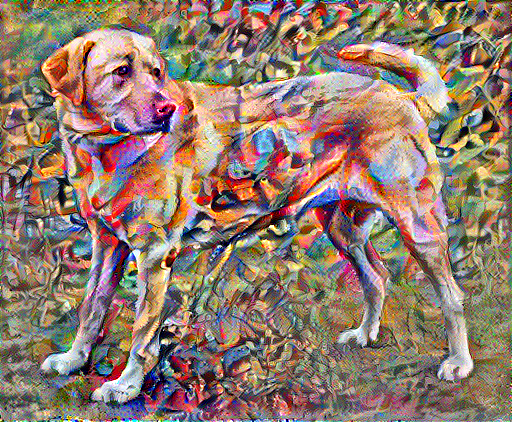

Train step: 1000
Total time: 200.6


In [82]:
import IPython.display as display
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

In [83]:
total_variation_weight=30

In [84]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [85]:
image = tf.Variable(content_image)

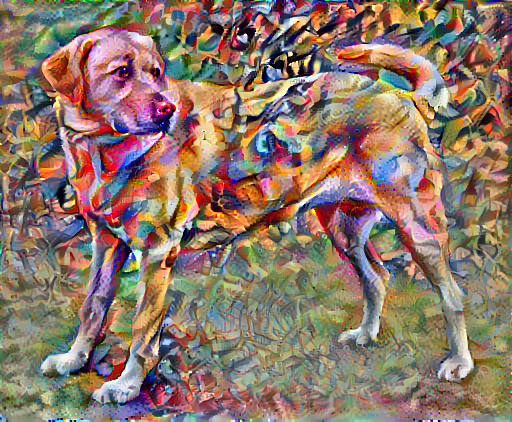

Train step: 1000
Total time: 203.4


In [86]:
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))